# The purpose is to show the SED of stars

## Definitions of the libraries

In [2]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [4]:
import pandas as pd
import os
import re

In [5]:
from astroquery.simbad import Simbad

In [74]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [7]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [8]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [9]:
dir_star='calspec'
dir_nostar='grid'

In [10]:
dir_submodels=['ags','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [11]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_star)

In [12]:
filelist=os.listdir(SEDfile_dir) 

In [13]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

## Find the star-names in the files

In [14]:
star_header = []
star_file_calspec = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        star_header.append(hdr)
        star_file_calspec.append(filename)

    START STIS                                                                   [astropy.io.fits.card]
FILE WRITTEN BY ECHLREDUCE.PRO ON 11-Jun-2013 11:27:39.00                        [astropy.io.fits.card]
coadd list for E*H:                                                              [astropy.io.fits.card]
 o57u01030 obb001040 obb005010 obb005020 obb001010 obb001090 obb005030           [astropy.io.fits.card]
 obb005040 obb001060 obb001030 o57u01020 obb001050 obb001020 obb0010a0           [astropy.io.fits.card]
 obb001070 o6hb100f0 obb001080 o57u01040 o5i011010 o5i011020 o5i011030           [astropy.io.fits.card]
 obb0010b0 obb002090 obb0020b0 obb002010 obb002030 o6hb20060 obb002020           [astropy.io.fits.card]
 o6hb20070 obb002040 o6hb20080 obb002050 obb002060 o6hb20090 obb002070           [astropy.io.fits.card]
 obb002080 obb0020a0 obb0020c0 obb0020d0 obb004080 obb053040 obb053080           [astropy.io.fits.card]
 obb053010 obb053020 obb053030 obb053050 obb053060 obb0530a0 obb

In [15]:
star_names = []
index=0
for hdr in star_header: 
    #print index
    if index!=72:
        star_name=star_header[index]['TARGETID']
        star_names.append(star_name)
        index+=1
    else:
        print '>>>>>> skip file # ',index, 'BAD HEADER'
        print '>>>>>> filename = ', filelist[index]
        print hdr
        index+=1

>>>>>> skip file #  72 BAD HEADER
>>>>>> filename =  gd153_stisnic_003.fits
SIMPLE  =                    T / Fits standard                                  BITPIX  =                   16 / Bits per pixel                                 NAXIS   =                    0 / Number of axes                                 EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2013-11-18T19:20:56' / Date FITS file was generated                  IRAF-TLM= '2015-01-06T17:00:23' / Time of last modification                     FILENAME= 'WDcovar.fits'       /                                                PEDIGREE= 'Models  '           /                                                DESCRIP = 'Bohlin & Gordon WD covariance for basis of HST relative fluxes-----' USEAFTER= 'January 1 2013'     /                                                HISTORY  5-Nov-2013 08:51:24.00 Created by u

In [16]:
print star_names

['GJ7541A', 'WD1657+343', 'P330E', 'MUCOL', 'bd60d1753', 'HD159222', 'sun_reference', '1808347', 'KF08T3', 'FEIGE110', 'HD180609', 'p177d', 'ETAUMA', 'G191B2B', 'G191B2B', 'HZ4', 'P041C', 'GD153_MOD', 'GRW+70D5824', 'HD93521', 'HZ21', 'WD1057_719_MOD', '1808347', 'HD163466', 'HS2027', 'HD116405', 'P177D', 'HZ43', 'KF06T1', 'KF06T2', '10lac', 'NGC7293', 'VB8', 'LDS749B', 'HD009051', 'HD38949', 'LAMLEP', 'WD1026_453', 'HD205905', 'FEIGE34', 'BD02D3375', 'HD106252', '1740346', 'HD111980', 'C26202', 'SF1615+001A', 'AGK+81D266', 'BD21D0607', '1805292', 'SNAP-1', 'hd209458', 'GRW+70D5824', 'p041c', 'BD+17D4708', 'LB227', 'hd38949', 'WD1057_719', 'WD1657_343_MOD', '1812095', 'HD160617', 'HZ43B', 'ALPHA_LYR', 'WD0308-565', '1805292', 'WD0320-539', 'GD153', 'BD+28D4211_FOS', 'KF01T5', 'lamlep', 'ALPHA_LYR', 'WD0320-539', 'GD153', 'KF06T2', 'BD+17D4708', 'HD185975', 'SNAP-1', 'BD21D0607', 'G191B2B', 'SF1615+001A', '2M0559-14', 'C26202', 'KSI2CETI', 'HD106252', '10LAC', 'GRW+70D5824', 'HZ43_MOD',

## Sort the star names

In [27]:
star_names_sorted=sorted(star_names,key=star_names.count,reverse=True) 

## Make every star name in upper case

In [32]:
star_names_sorted_upper = map(lambda s: s.upper(), star_names_sorted)

## Remove multiple entries

In [33]:
star_names_set=set(star_names_sorted_upper)

## Make a dictionary of filenames

In [64]:
StarDict= {}
for star in star_names_set:
    print star,': \n'
    star_set_of_file= []
    tag_upper='^'+star.upper()+'*'
    tag_lower='^'+star.lower()+'*'
    for thefile in fits_files:
        if re.search(tag_upper,thefile) or re.search(tag_lower,thefile):         
            star_set_of_file.append(thefile)
    #StarDict[star]=sorted(star_set_of_file,key=star_names.count,reverse=True)
    StarDict[star]=sorted(star_set_of_file,key=star_names.count)
    print StarDict[star] ,'\n'
    
            
    

P177D : 

['p177d_001.fits', 'p177d_stisnic_004.fits', 'p177d_mod_001.fits', 'p177d_stisnic_005.fits', 'p177d_stisnic_002.fits', 'p177d_stisnic_003.fits', 'p177d_stis_001.fits', 'p177d_stisnic_001.fits', 'p177d_mod_002.fits', 'p177d_stisnic_006.fits', 'p177d_stisnic_007.fits'] 

BD+33D2642 : 

[] 

WD1657_343 : 

['wd1657_343_stisnic_005.fits', 'wd1657_343_mod_001.fits', 'wd1657_343_stisnic_004.fits', 'wd1657_343_stisnic_003.fits', 'wd1657_343_stisnic_002.fits', 'wd1657_343_mod_005.fits', 'wd1657_343_stisnic_001.fits', 'wd1657_343_mod_004.fits', 'wd1657_343_mod_003.fits', 'wd1657_343_mod_002.fits', 'wd1657_343_stisnic_006.fits'] 

G191B2B_NIC : 

['g191b2b_nic_001.fits'] 

BD21D0607 : 

['bd21d0607_stis_003.fits', 'bd21d0607_stis_002.fits', 'bd21d0607_stis_001.fits'] 

HD14943 : 

['hd14943_mod_001.fits', 'hd14943_stis_001.fits', 'hd14943_stis_002.fits', 'hd14943_stis_003.fits', 'hd14943_mod_002.fits', 'hd14943_stis_004.fits'] 

HD37725 : 

['hd37725_mod_002.fits', 'hd37725_stis_001.fi

## Plot the SED

Warning, 38 of 1353 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 2064 bins contained negative fluxes; they have been set to zero.
Warning, 38 of 1353 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 7208 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 4685 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 2866 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 2840 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 2840 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6265 bins contained negative fluxes; they have been set to zero.
Warning, 94 of 2216 bins contained negative f

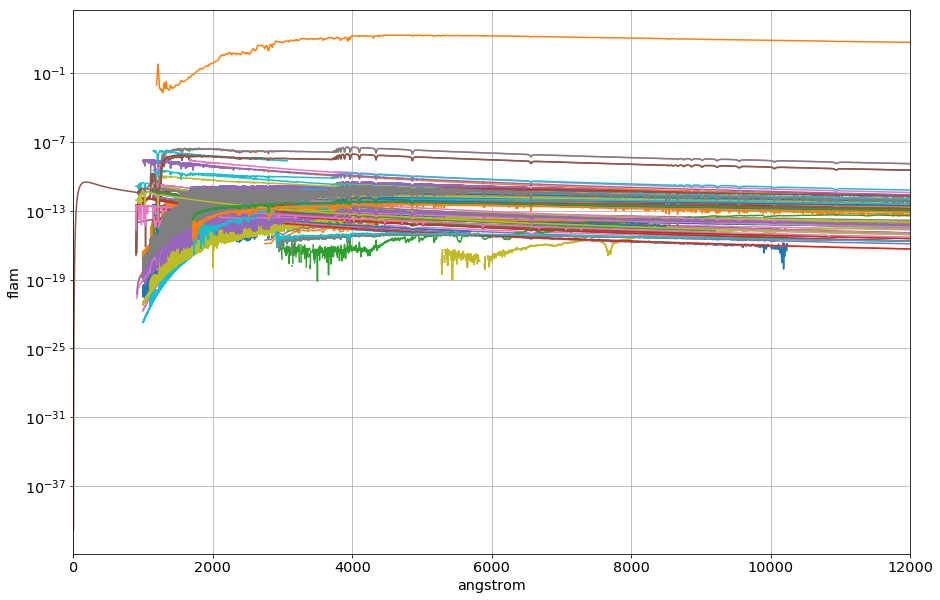

In [77]:
for keystar in StarDict:
    the_files=StarDict[keystar]
    if(len(the_files))>0:
        #print sorted(the_files,reverse=True)
        
        selected_file=the_files[0]
        selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
        sed=S.FileSpectrum(selected_fullfile)
        
        plt.semilogy(sed.wave,sed.flux)
        plt.xlim(0, 12000)
        plt.xlabel(sed.waveunits)
        plt.ylabel(sed.fluxunits)
        plt.grid(True)
#    plt.title(os.path.basename(S.Vega.name))